In [2]:
%cd /home/aditya/Documents/SOMBL/
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from tqdm import tqdm
import seaborn as sns

import scripts.plot_utils as putils
import scripts.plot_densities as pdens
sns.set()

/home/aditya/Documents/SOMBL


In [3]:
%config InlineBackend.figure_format = 'svg'

In [4]:
colorbar_kwargs = {
    "location": "right",
    "fraction": 0.046,
    "pad": 0.04,
    "format": "%.2e"
}

In [5]:
def get_densities(length, coupling, disorder, binnum, pattern):
    prefix = "data/mbl_density"
    totalbins = 50
    kwargs = {
        "size": length,
        "coupling": coupling,
        "disorder": disorder,
        "hopup": 1.0,
        "hopdn": 1.0,
        "runs": 100,
        "nospin": False,
        "binnum": 2,
        "alpha": 0,
        "beta": 0
    }
    params = putils.SystemParams(**kwargs)
    GR_GRstar = pdens.calculate(kwargs, totalbins, prefix, pattern)
    densities = pdens.get_final_densities(GR_GRstar, binnum)
    return densities

In [6]:
def calculate_spin_imbalance(density, initial_cond, length):
    upList, downList = initial_cond
    imb = 0
    if upList is not None:
        for index in upList:
            x = index % length
            y = index // length
            imb += 1 * density[x, y]
            
    if downList is not None:
        for index in downList:
            x = index % length
            y = index // length
            imb += -1 * density[x, y]
            
    imb /= np.sum(density)
    return imb

In [7]:
def calculate_imbalance(density, length, setA):
    imb = 0
    sorted_setA = sorted(setA)
    for x in range(length):
        for y in range(length):
            index = x + length*y
            if index not in setA:
                imb -= density[x, y]
    for index in setA:
        x = index % length
        y = index // length
        imb += density[x, y]
                        
    imb /= np.sum(density)
    return imb

In [1]:
pattern = "altn_up_down"
length = 100
totalbins = 50
densities = get_densities(length, 0.3, 15, -1, pattern)
initial_cond = putils.get_initial_condition(pattern, length)
# print(calculate_imbalance(densities[0], initial_cond, length))

NameError: name 'get_densities' is not defined

## Charge Imbalance
For charge imbalance $A$ is the whole lattice for the alternating up-down pattern. So all the imbalances are expected to be $1$.

In [9]:
pspace = [(c, w) for w in [10, 11, 12] for c in [1.5, 1.6, 1.7]]
pspace += [(c, w) for w in [13, 14, 15] for c in [0.3, 0.4, 0.5]]

In [10]:
upList, downList = putils.get_initial_condition(pattern, length)
# For charge imbalance
if upList is None:
    upList = []
if downList is None:
    downList = []
setA = list(upList) + list(downList)

data = []
for coupling, disorder in pspace:
    print(f"α = {coupling} W = {disorder}")
    for binnum in tqdm(range(-1, totalbins)):
        densities = get_densities(length, coupling, disorder, binnum, pattern)
        charge_density = densities[0] + densities[1]
        datapoint = {
            "coupling": coupling,
            "disorder": disorder,
            "binnum": binnum,
            "imb_n_up": calculate_imbalance(densities[0], length, setA),
            "imb_n_down": calculate_imbalance(densities[1], length, setA),
            "imb_S_plus": calculate_imbalance(densities[2], length, setA),
            "imb_S_minus": calculate_imbalance(densities[3], length, setA),
            "imb_charge": calculate_imbalance(charge_density, length, setA)
        }
        data.append(datapoint)
        
df = pd.DataFrame(data)

α = 1.5 W = 10


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:25<00:00,  1.96it/s]


α = 1.6 W = 10


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:25<00:00,  2.03it/s]


α = 1.7 W = 10


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:25<00:00,  2.04it/s]


α = 1.5 W = 11


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:25<00:00,  2.03it/s]


α = 1.6 W = 11


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:25<00:00,  2.03it/s]


α = 1.7 W = 11


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:25<00:00,  2.01it/s]


α = 1.5 W = 12


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:25<00:00,  2.01it/s]


α = 1.6 W = 12


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:25<00:00,  2.02it/s]


α = 1.7 W = 12


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:25<00:00,  2.03it/s]


α = 0.3 W = 13


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:28<00:00,  1.77it/s]


α = 0.4 W = 13


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:29<00:00,  1.72it/s]


α = 0.5 W = 13


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:28<00:00,  1.78it/s]


α = 0.3 W = 14


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:28<00:00,  1.76it/s]


α = 0.4 W = 14


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:29<00:00,  1.75it/s]


α = 0.5 W = 14


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:28<00:00,  1.76it/s]


α = 0.3 W = 15


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:29<00:00,  1.75it/s]


α = 0.4 W = 15


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:29<00:00,  1.75it/s]


α = 0.5 W = 15


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:29<00:00,  1.75it/s]


In [12]:
df.to_csv(f"data/charge_imbalances_L{length}_{pattern}.dat")

In [11]:
df

,coupling,disorder,binnum,imb_n_up,imb_n_down,imb_S_plus,imb_S_minus,imb_charge
0,1.5,10,-1,0.507336,0.507336,0.611289-1.151155j,0.611289+1.151155j,0.507336
1,1.5,10,0,0.500165,0.500165,-1.038085-0.028135j,-1.038085+0.028135j,0.500165
2,1.5,10,1,0.500249,0.500249,-1.392160-0.365542j,-1.392160+0.365542j,0.500249
3,1.5,10,2,0.500362,0.500362,0.094528-0.043882j,0.094528+0.043882j,0.500362
4,1.5,10,3,0.500497,0.500497,-2.475632-3.721688j,-2.475632+3.721688j,0.500497
...,...,...,...,...,...,...,...,...
913,0.5,15,45,0.506061,0.506061,1.587036+0.868344j,1.587036-0.868344j,0.506061
914,0.5,15,46,0.506911,0.506911,1.579504+1.448262j,1.579504-1.448262j,0.506911
915,0.5,15,47,0.506555,0.506555,-0.706737-0.763997j,-0.706737+0.763997j,0.506555
916,0.5,15,48,0.506708,0.506708,-6.757402-2.707523j,-6.757402+2.707523j,0.506708


In [42]:
df = pd.read_csv(f"data/charge_imbalances_L{length}_{pattern}.dat")
df

,Unnamed: 0,coupling,disorder,binnum,imb_n_up,imb_n_down,imb_S_plus,imb_S_minus,imb_charge
0,0,1.5,10,-1,0.507336,0.507336,(0.6112893894951535-1.1511549444016353j),(0.6112893894951535+1.1511549444016353j),0.507336
1,1,1.5,10,0,0.500165,0.500165,(-1.0380848134271659-0.028135438887945705j),(-1.0380848134271659+0.028135438887945705j),0.500165
2,2,1.5,10,1,0.500249,0.500249,(-1.3921601732118365-0.36554228147047896j),(-1.3921601732118365+0.36554228147047896j),0.500249
3,3,1.5,10,2,0.500362,0.500362,(0.09452752796816712-0.04388249755299043j),(0.09452752796816712+0.04388249755299043j),0.500362
4,4,1.5,10,3,0.500497,0.500497,(-2.4756324989849428-3.721688082736162j),(-2.4756324989849428+3.721688082736162j),0.500497
...,...,...,...,...,...,...,...,...,...
913,913,0.5,15,45,0.506061,0.506061,(1.587035988364328+0.8683436105093854j),(1.587035988364328-0.8683436105093854j),0.506061
914,914,0.5,15,46,0.506911,0.506911,(1.5795038451115893+1.4482622937839928j),(1.5795038451115893-1.4482622937839928j),0.506911
915,915,0.5,15,47,0.506555,0.506555,(-0.7067366166910213-0.7639966135847108j),(-0.7067366166910213+0.7639966135847108j),0.506555
916,916,0.5,15,48,0.506708,0.506708,(-6.757402457145512-2.7075227966053474j),(-6.757402457145512+2.7075227966053474j),0.506708


<AxesSubplot:xlabel='disorder', ylabel='imb_n_up'>

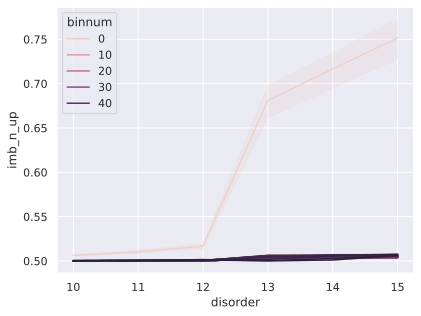

In [43]:
sns.lineplot(data=df, x="disorder", y="imb_n_up", hue="binnum")

In [44]:
loc_df = df.loc[df["disorder"].isin([13, 14, 15])]
deloc_df = df.loc[df["disorder"].isin([10, 11, 12])]

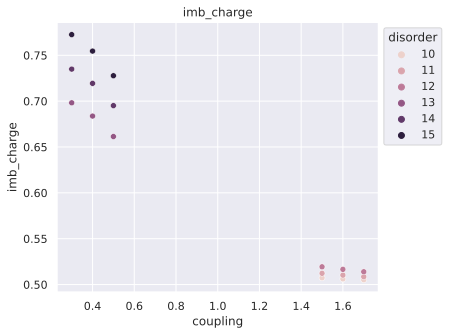

In [63]:
# sns.heatmap(data=pd.pivot_table(data=df, index="coupling", columns="disorder", values="imb_charge"))
fig, axes = plt.subplots(nrows=1, ncols=1)
# for i, imb in enumerate(imbalances_real):
imb = "imb_charge"
# ax = axes.flatten()
ax = axes
# pivoted = pd.pivot_table(data=df, index="coupling", columns="disorder", values=imb)
sns.scatterplot(data=df.loc[df["binnum"]==-1], x="coupling", y=imb, hue="disorder", ax=ax)
ax.set_xlim(np.min(ax.get_xlim()), np.max(ax.get_xlim()))
ax.set_ylim(np.min(ax.get_ylim()), np.max(ax.get_ylim()))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title(imb)
fig.tight_layout()

In [ ]:
sns.relplot

## Spin Imbalance
We can ask for spin imbalance in three different ways:
1. Spin Up Imbalance $A = {sites\ where\ }$

In [17]:
upList, downList = putils.get_initial_condition(pattern, length)
# For charge imbalance
if upList is None:
    upList = []
if downList is None:
    downList = []
setAup = list(upList)
setAdown = list(downList)

data = []
for coupling, disorder in pspace:
    print(f"α = {coupling} W = {disorder}")
    for binnum in tqdm(range(-1, totalbins)):
        densities = get_densities(length, coupling, disorder, binnum, pattern)
        charge_density = densities[0] + densities[1]
        datapoint = {
            "coupling": coupling,
            "disorder": disorder,
            "binnum": binnum,
            "spin_up_imb_n_up": calculate_imbalance(densities[0], length, setAup),
            "spin_up_imb_n_down": calculate_imbalance(densities[1], length, setAup),
            "spin_up_imb_S_plus": calculate_imbalance(densities[2], length, setAup),
            "spin_up_imb_S_minus": calculate_imbalance(densities[3], length, setAup),
            "spin_up_imb_charge": calculate_imbalance(charge_density, length, setAup),
            "spin_down_imb_n_up": calculate_imbalance(densities[0], length, setAdown),
            "spin_down_imb_n_down": calculate_imbalance(densities[1], length, setAdown),
            "spin_down_imb_S_plus": calculate_imbalance(densities[2], length, setAdown),
            "spin_down_imb_S_minus": calculate_imbalance(densities[3], length, setAdown),
            "spin_down_imb_charge": calculate_imbalance(charge_density, length, setAdown)
        }
        data.append(datapoint)
        
df = pd.DataFrame(data)

α = 1.5 W = 10


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:28<00:00,  1.82it/s]


α = 1.6 W = 10


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:27<00:00,  1.84it/s]


α = 1.7 W = 10


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:27<00:00,  1.86it/s]


α = 1.5 W = 11


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:27<00:00,  1.84it/s]


α = 1.6 W = 11


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:27<00:00,  1.82it/s]


α = 1.7 W = 11


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:28<00:00,  1.81it/s]


α = 1.5 W = 12


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:33<00:00,  1.54it/s]


α = 1.6 W = 12


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:31<00:00,  1.63it/s]


α = 1.7 W = 12


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:28<00:00,  1.77it/s]


α = 0.3 W = 13


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:33<00:00,  1.50it/s]


α = 0.4 W = 13


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:33<00:00,  1.54it/s]


α = 0.5 W = 13


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:34<00:00,  1.47it/s]


α = 0.3 W = 14


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:33<00:00,  1.51it/s]


α = 0.4 W = 14


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:33<00:00,  1.51it/s]


α = 0.5 W = 14


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:33<00:00,  1.51it/s]


α = 0.3 W = 15


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:32<00:00,  1.55it/s]


α = 0.4 W = 15


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:31<00:00,  1.60it/s]


α = 0.5 W = 15


100%|███████████████████████████████████████████████████████████████████| 51/51 [00:31<00:00,  1.60it/s]


In [18]:
df

,coupling,disorder,binnum,spin_up_imb_n_up,spin_up_imb_n_down,spin_up_imb_S_plus,spin_up_imb_S_minus,spin_up_imb_charge,spin_down_imb_n_up,spin_down_imb_n_down,spin_down_imb_S_plus,spin_down_imb_S_minus,spin_down_imb_charge
0,1.5,10,-1,0.004891,0.004891,0.074193-0.767437j,0.074193+0.767437j,0.004891,0.004891,0.004891,0.074193-0.767437j,0.074193+0.767437j,0.004891
1,1.5,10,0,0.000110,0.000110,-1.025390-0.018757j,-1.025390+0.018757j,0.000110,0.000110,0.000110,-1.025390-0.018757j,-1.025390+0.018757j,0.000110
2,1.5,10,1,0.000166,0.000166,-1.261440-0.243695j,-1.261440+0.243695j,0.000166,0.000166,0.000166,-1.261440-0.243695j,-1.261440+0.243695j,0.000166
3,1.5,10,2,0.000241,0.000241,-0.270315-0.029255j,-0.270315+0.029255j,0.000241,0.000241,0.000241,-0.270315-0.029255j,-0.270315+0.029255j,0.000241
4,1.5,10,3,0.000332,0.000332,-1.983755-2.481125j,-1.983755+2.481125j,0.000332,0.000332,0.000332,-1.983755-2.481125j,-1.983755+2.481125j,0.000332
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.5,15,45,0.004041,0.004041,0.724691+0.578896j,0.724691-0.578896j,0.004041,0.004041,0.004041,0.724691+0.578896j,0.724691-0.578896j,0.004041
914,0.5,15,46,0.004607,0.004607,0.719669+0.965508j,0.719669-0.965508j,0.004607,0.004607,0.004607,0.719669+0.965508j,0.719669-0.965508j,0.004607
915,0.5,15,47,0.004370,0.004370,-0.804491-0.509331j,-0.804491+0.509331j,0.004370,0.004370,0.004370,-0.804491-0.509331j,-0.804491+0.509331j,0.004370
916,0.5,15,48,0.004472,0.004472,-4.838268-1.805015j,-4.838268+1.805015j,0.004472,0.004472,0.004472,-4.838268-1.805015j,-4.838268+1.805015j,0.004472


In [19]:
df.to_csv(f"data/spin_imbalances_L{length}_{pattern}.dat")

In [20]:
df = pd.read_csv(f"data/spin_imbalances_L{length}_{pattern}.dat")
complex_types = {
    'spin_up_imb_S_plus': complex,
    'spin_up_imb_S_minus': complex,
    'spin_down_imb_S_plus': complex,
    'spin_down_imb_S_minus': complex,
}
df = df.astype(complex_types)

In [21]:
loc_df = df.loc[df["disorder"].isin([13, 14, 15])]
deloc_df = df.loc[df["disorder"].isin([10, 11, 12])]

In [22]:
df

,Unnamed: 0,coupling,disorder,binnum,spin_up_imb_n_up,spin_up_imb_n_down,spin_up_imb_S_plus,spin_up_imb_S_minus,spin_up_imb_charge,spin_down_imb_n_up,spin_down_imb_n_down,spin_down_imb_S_plus,spin_down_imb_S_minus,spin_down_imb_charge
0,0,1.5,10,-1,0.004891,0.004891,0.074193-0.767437j,0.074193+0.767437j,0.004891,0.004891,0.004891,0.074193-0.767437j,0.074193+0.767437j,0.004891
1,1,1.5,10,0,0.000110,0.000110,-1.025390-0.018757j,-1.025390+0.018757j,0.000110,0.000110,0.000110,-1.025390-0.018757j,-1.025390+0.018757j,0.000110
2,2,1.5,10,1,0.000166,0.000166,-1.261440-0.243695j,-1.261440+0.243695j,0.000166,0.000166,0.000166,-1.261440-0.243695j,-1.261440+0.243695j,0.000166
3,3,1.5,10,2,0.000241,0.000241,-0.270315-0.029255j,-0.270315+0.029255j,0.000241,0.000241,0.000241,-0.270315-0.029255j,-0.270315+0.029255j,0.000241
4,4,1.5,10,3,0.000332,0.000332,-1.983755-2.481125j,-1.983755+2.481125j,0.000332,0.000332,0.000332,-1.983755-2.481125j,-1.983755+2.481125j,0.000332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,913,0.5,15,45,0.004041,0.004041,0.724691+0.578896j,0.724691-0.578896j,0.004041,0.004041,0.004041,0.724691+0.578896j,0.724691-0.578896j,0.004041
914,914,0.5,15,46,0.004607,0.004607,0.719669+0.965508j,0.719669-0.965508j,0.004607,0.004607,0.004607,0.719669+0.965508j,0.719669-0.965508j,0.004607
915,915,0.5,15,47,0.004370,0.004370,-0.804491-0.509331j,-0.804491+0.509331j,0.004370,0.004370,0.004370,-0.804491-0.509331j,-0.804491+0.509331j,0.004370
916,916,0.5,15,48,0.004472,0.004472,-4.838268-1.805015j,-4.838268+1.805015j,0.004472,0.004472,0.004472,-4.838268-1.805015j,-4.838268+1.805015j,0.004472


<AxesSubplot:xlabel='disorder', ylabel='coupling'>

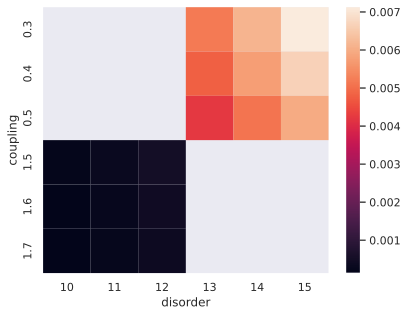

In [23]:
sns.heatmap(data=pd.pivot_table(data=df, index="coupling", columns="disorder", values="spin_up_imb_n_up"))

In [24]:
imbalances_real = ["spin_up_imb_n_up", "spin_up_imb_n_down",  "spin_up_imb_charge", "spin_down_imb_n_up",
            "spin_down_imb_n_down", "spin_down_imb_charge"]
imbalances_complex = ["spin_up_imb_S_plus",
            "spin_up_imb_S_minus", "spin_down_imb_S_plus", "spin_down_imb_S_minus",]
imbalances_considered = ["spin_up_imb_n_up"] #, "spin_down_imb_n_down"]

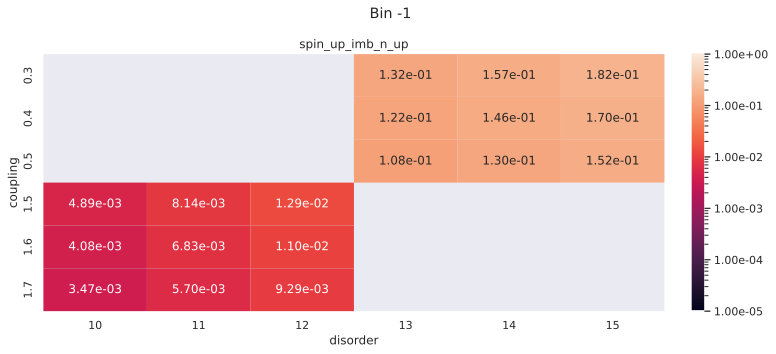

In [25]:
binnum = -1
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11, 5))
for i, imb in enumerate(imbalances_considered):
    # ax = axes.flatten()[i]
    ax = axes
    pivoted = pd.pivot_table(data=df.loc[df["binnum"]==binnum], index="coupling",
                            columns="disorder", values=imb)
    cbar_kwargs = colorbar_kwargs.copy()
    # vmin = pivoted.min().min()
    # vmax = pivoted.max().max()
    vmin = 1e-5
    vmax = 1e0
    # print(vmin, vmax)
    norm = mpl.colors.LogNorm(vmin=vmin, vmax=vmax)
    # cbar_kwargs["ticks"] = np.logspace(0, -3, 4)
    sns.heatmap(data=pivoted, ax=ax, cbar_kws=cbar_kwargs, norm=norm, annot=True, fmt=".2e")
    ax.set_title(imb)
fig.suptitle(f"Bin {binnum}")
fig.tight_layout()

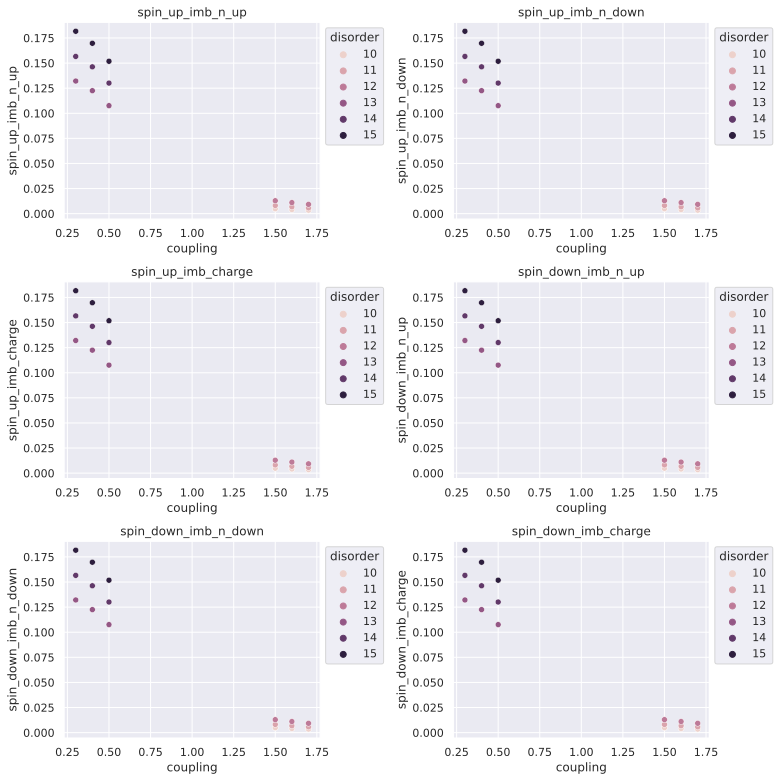

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(11, 11))
for i, imb in enumerate(imbalances_real):
    ax = axes.flatten()[i]
    # pivoted = pd.pivot_table(data=df, index="coupling", columns="disorder", values=imb)
    sns.scatterplot(data=df.loc[df["binnum"]==-1], x="coupling", y=imb, hue="disorder", ax=ax)
    ax.set_xlim(np.min(ax.get_xlim()), np.max(ax.get_xlim()))
    ax.set_ylim(np.min(ax.get_ylim()), np.max(ax.get_ylim()))
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.set_title(imb)
fig.tight_layout()

In [ ]:

for disorder in [13, 14, 15]:
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(11, 11))
    # for binnum in range(-1, totalbins):
    for i, imb in enumerate(imbalances_considered):
        # ax = axes.flatten()[i]
        ax = axes
        # pivoted = pd.pivot_table(data=df, index="coupling", columns="disorder", values=imb)
        cond = (loc_df["disorder"] == disorder)
        sns.scatterplot(data=loc_df.loc[cond], x="binnum", y=imb, hue="coupling", ax=ax)
        # ax.set_xlim(np.min(ax.get_xlim()), np.max(ax.get_xlim()))
        # ax.set_ylim(np.min(ax.get_ylim()), np.max(ax.get_ylim()))
        # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        ax.set_yscale("log")
        ax.set_title(f"{imb} W = {disorder}")

    fig.tight_layout()
    filename = f"imbalances_60x60_W{disorder}"
    fig.savefig("plots/PNGs/" + filename + ".png")
    fig.savefig("plots/PDFs/" + filename + ".pdf")
    plt.close(fig)

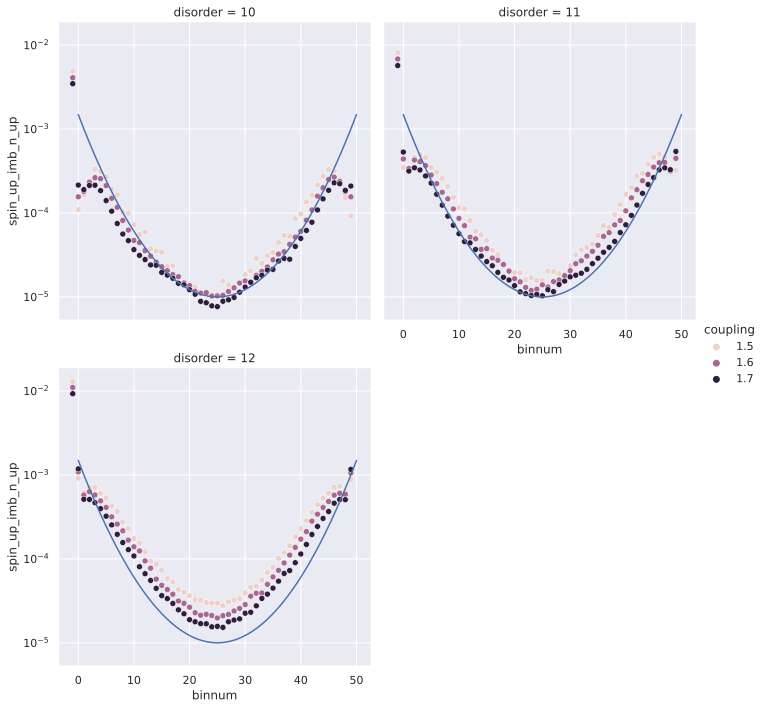

In [28]:
data = deloc_df
plot = sns.relplot(data=data, x="binnum", y=np.abs(data["spin_up_imb_n_up"]), hue="coupling",
                   col="disorder", col_wrap=2)
x = np.linspace(0, 50, 200)
y = 1e-5 * np.exp(8e-3*(x-25)**2)
for ax in plot.fig.axes:
    ax.set_yscale('log')
    ax.plot(x, y)

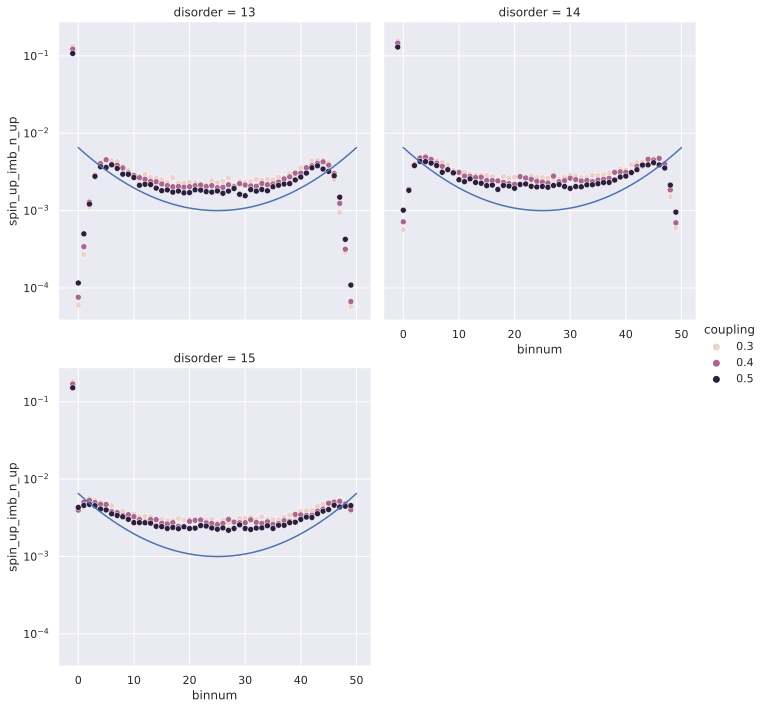

In [30]:
plot = sns.relplot(data=loc_df, x="binnum", y=np.abs(loc_df["spin_up_imb_n_up"]), hue="coupling",
                   col="disorder", col_wrap=2)
x = np.linspace(0, 50, 200)
y = 1e-3 * np.exp(3e-3*(x-25)**2)

for ax in plot.fig.axes:
    ax.set_yscale('log')
    ax.plot(x, y)

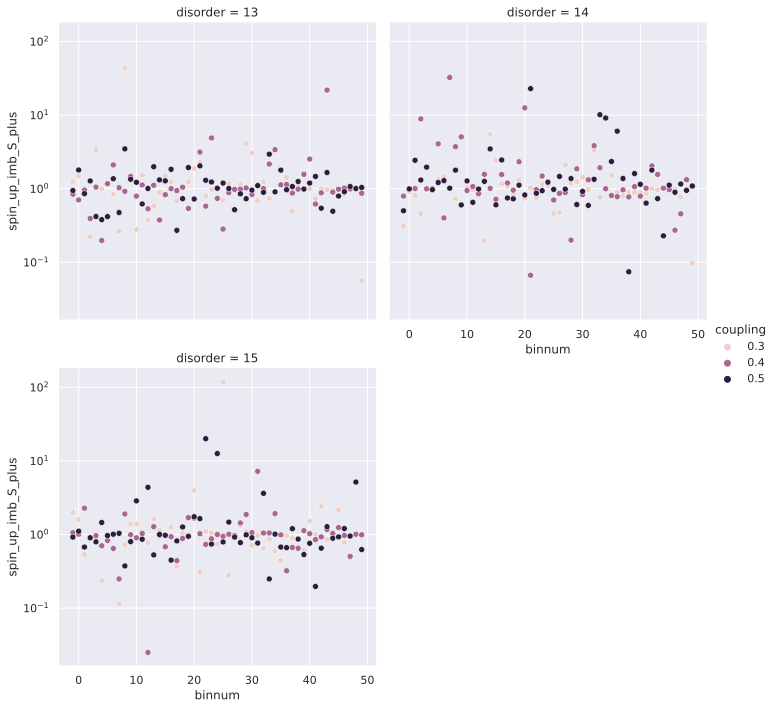

In [34]:
plot = sns.relplot(data=loc_df, x="binnum", y=np.abs(loc_df["spin_up_imb_S_plus"]),
                   hue="coupling", col="disorder", col_wrap=2)
x = np.linspace(0, 50, 200)
y = 1e-3 * np.exp(3e-3*(x-25)**2)

for ax in plot.fig.axes:
    ax.set_yscale('log')
    # ax.plot(x, y)

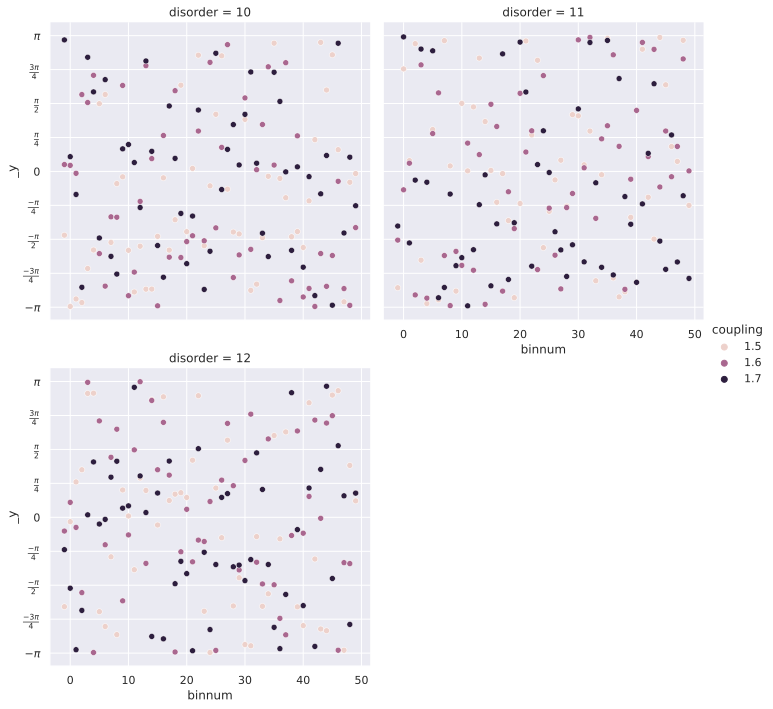

In [35]:
plot = sns.relplot(data=deloc_df, x="binnum",
                   y=np.angle(deloc_df["spin_up_imb_S_plus"]),
                   hue="coupling", col="disorder", col_wrap=2)
x = np.linspace(0, 50, 200)
y = 1e-3 * np.exp(3e-3*(x-25)**2)
for ax in plot.fig.axes:
    ticks = np.pi * np.array([-1, -3/4, -1/2, -1/4, 0, 1/4, 1/2, 3/4, 1])
    ticklabels = [r"$-\pi$", r"$\frac{-3\pi}{4}$", r"$\frac{-\pi}{2}$", r"$\frac{-\pi}{4}$", 0,
                 r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$", r"$\frac{3\pi}{4}$", r"$\pi$"]
    ax.set_yticks(ticks=ticks, labels=ticklabels)
    # ax.set_yscale('log')
    # ax.plot(x, y)

0.000000e+00


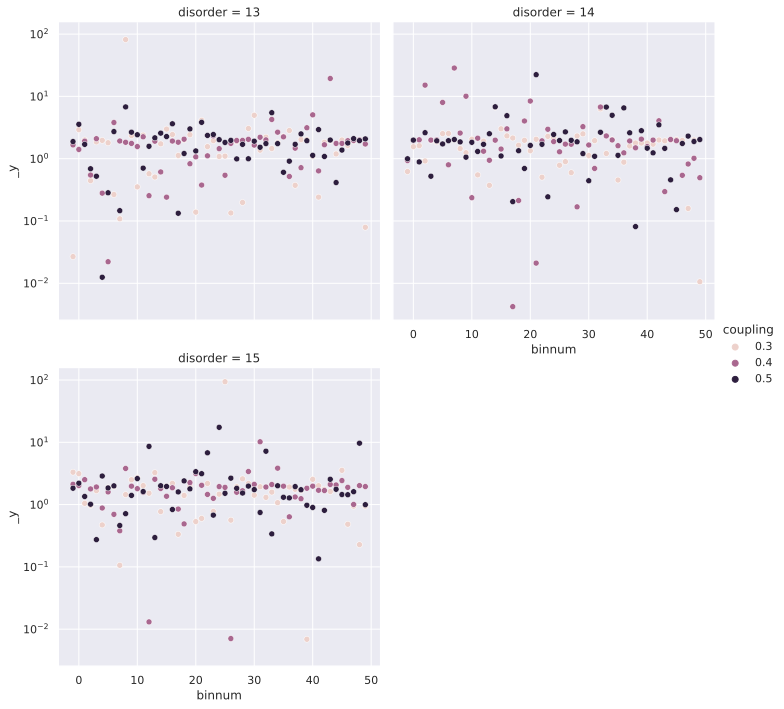

In [40]:
data = loc_df
sigma_x = data["spin_up_imb_S_plus"] + data["spin_up_imb_S_minus"]
print(f"{np.abs(np.imag(sigma_x)).min():e}")
plot = sns.relplot(data=data, x="binnum",
                   y=np.abs(np.real(sigma_x)),
                   hue="coupling", col="disorder", col_wrap=2)
x = np.linspace(0, 50, 200)
y = 1e-3 * np.exp(3e-3*(x-25)**2)
for ax in plot.fig.axes:
#     ticks = np.pi * np.array([-1, -3/4, -1/2, -1/4, 0, 1/4, 1/2, 3/4, 1])
#     ticklabels = [r"$-\pi$", r"$\frac{-3\pi}{4}$", r"$\frac{-\pi}{2}$", r"$\frac{-\pi}{4}$", 0,
#                  r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$", r"$\frac{3\pi}{4}$", r"$\pi$"]
#     ax.set_yticks(ticks=ticks, labels=ticklabels)
    ax.set_yscale('log')
    # ax.plot(x, y)

0.000000e+00


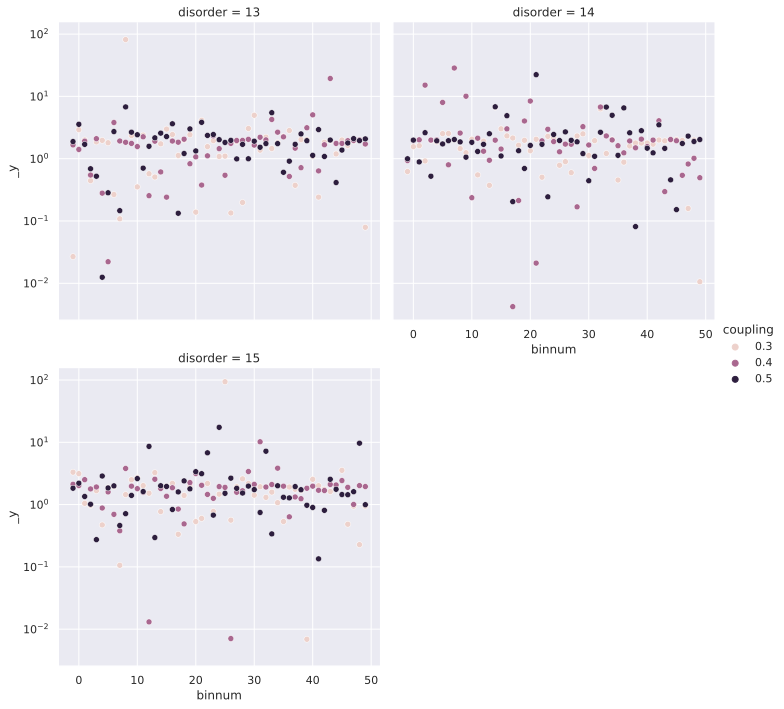

In [40]:
data = loc_df
sigma_x = data["spin_up_imb_n"] + data["spin_up_imb_S_minus"]
print(f"{np.abs(np.imag(sigma_x)).min():e}")
plot = sns.relplot(data=data, x="binnum",
                   y=np.abs(np.real(sigma_x)),
                   hue="coupling", col="disorder", col_wrap=2)
x = np.linspace(0, 50, 200)
y = 1e-3 * np.exp(3e-3*(x-25)**2)
for ax in plot.fig.axes:
#     ticks = np.pi * np.array([-1, -3/4, -1/2, -1/4, 0, 1/4, 1/2, 3/4, 1])
#     ticklabels = [r"$-\pi$", r"$\frac{-3\pi}{4}$", r"$\frac{-\pi}{2}$", r"$\frac{-\pi}{4}$", 0,
#                  r"$\frac{\pi}{4}$", r"$\frac{\pi}{2}$", r"$\frac{3\pi}{4}$", r"$\pi$"]
#     ax.set_yticks(ticks=ticks, labels=ticklabels)
    ax.set_yscale('log')
    # ax.plot(x, y)

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(11, 11))
for binnum in range(-1, totalbins):
    for i, imb in enumerate(imbalances_considered):
        ax = axes.flatten()[i]
        # pivoted = pd.pivot_table(data=df, index="coupling", columns="disorder", values=imb)
        sns.scatterplot(data=np.and(df.loc[df["binnum"]==binnumdf[]], x="coupling", y=imb, hue="disorder", ax=ax)
        ax.set_xlim(np.min(ax.get_xlim()), np.max(ax.get_xlim()))
        ax.set_ylim(np.min(ax.get_ylim()), np.max(ax.get_ylim()))
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
        ax.set_title(imb)
    fig.tight_layout()
    filename = f"imbalances_60x60_bin{binnum}"
    fig.savefig("plots/PNGs/" + filename + ".png")
    fig.savefig("plots/PDFs/" + filename + ".pdf")
    plt.close(fig)

SyntaxError: invalid syntax (2578309818.py, line 6)

In [64]:
density = np.zeros((length,length))
for x in range(length):
    for y in range(length):
        index = x + length*y
        if(index in upList):
            density[x, y] += 1
        if(index in downList):
            density[x, y] += 1

print(density)
calculate_imbalance(density, length, setAup)

[[2. 0. 2. ... 0. 2. 0.]
 [0. 2. 0. ... 2. 0. 2.]
 [2. 0. 2. ... 0. 2. 0.]
 ...
 [0. 2. 0. ... 2. 0. 2.]
 [2. 0. 2. ... 0. 2. 0.]
 [0. 2. 0. ... 2. 0. 2.]]


1.0

In [ ]:
n_up, n_down